<p>Sena Gümüştekin 20200305013
   Nilay Özcan     20200305027</p>

## <b> <span style='color:#2ae4f5'>|</span> Import Essential Libraries</b> 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.frequent_patterns import apriori, association_rules

## <b> <span style='color:#2ae4f5'>|</span> Import Dataset</b> 

In [6]:
file_path = '20200305013.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully from {file_path}")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    raise

Dataset loaded successfully from 20200305013.csv


## <b> <span style='color:#2ae4f5'>|</span> Regression: Features and Target separation</b> 

In this step, independent variables (X_reg) and the dependent variable (y_reg) are separated for the regression model. The "Diabetes" column is set as the target variable, while the other columns are used as features for prediction.

In [7]:
X_reg = df.drop(columns=['Diabetes'])
y_reg = df['Diabetes']

## <b> <span style='color:#2ae4f5'>|</span> Features and Target separation for Classification</b> 

In this step, the independent variables (X_class) and the target variable (y_class) are prepared for the classification task. The "Diabetes" column serves as the target variable, while the other columns act as features for classification.

In [8]:
X_class = df.drop(columns=['Diabetes'])
y_class = df['Diabetes']

## <b> <span style='color:#2ae4f5'>|</span> Separation into Training and Test Sets</b> 

In this step, the dataset is split into training and test sets for both regression and classification tasks.

For regression, 20% of the data is reserved for testing, and the split is randomized using a fixed seed (random_state=42).

For classification, the split also ensures that the target variable's class distribution is maintained in both sets using stratify=y_class.

In [9]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

## <b> <span style='color:#2ae4f5'>|</span> Standardizing Features</b> 

This step standardizes the features for both regression and classification tasks. Standardization scales the data so that it has a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally to the model.

In [10]:
scaler = StandardScaler()
X_train_scaled_reg = scaler.fit_transform(X_train_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)
X_train_scaled_class = scaler.fit_transform(X_train_class)
X_test_scaled_class = scaler.transform(X_test_class)

## <b> <span style='color:#2ae4f5'>|</span> 1. CLASSIFICATION TASK</b> 

## <b> <span style='color:#2ae4f5'>|</span> 1.1 Random Forest Classifier for classification model</b> 

A parameter grid is defined for tuning the Random Forest model, specifying possible values for the number of trees, tree depth, and minimum samples for splitting nodes.

In [11]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
}

## <b> <span style='color:#2ae4f5'>|</span> Random Forest Classifier Model Tuning with GridSearchCV</b> 

This code performs hyperparameter tuning for the Random Forest Classifier using GridSearchCV.

In [13]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train_scaled_class, y_train_class)
print("\nBest Parameters (Classification):", grid_search.best_params_)
clf = grid_search.best_estimator_
y_pred_clf = clf.predict(X_test_scaled_class)
y_proba_clf = clf.predict_proba(X_test_scaled_class)[:, 1]


Best Parameters (Classification): {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


## <b> <span style='color:#2ae4f5'>|</span>  1.2 Classification Results</b> 

This code prints the evaluation metrics for the classification model, including accuracy, precision, recall, F1-score, and ROC-AUC. These metrics help assess the model's performance in classifying the target variable.

In [11]:
print("Classification Results:")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_clf):.4f}")
print(f"Precision: {precision_score(y_test_class, y_pred_clf):.4f}")
print(f"Recall: {recall_score(y_test_class, y_pred_clf):.4f}")
print(f"F1-Score: {f1_score(y_test_class, y_pred_clf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_class, y_proba_clf):.4f}")

Classification Results:
Accuracy: 0.9605
Precision: 0.9316
Recall: 0.9387
F1-Score: 0.9351
ROC-AUC: 0.9926


## <b> <span style='color:#2ae4f5'>|</span>  Confusion Matrix</b> 

This code generates and visualizes the confusion matrix for the classification model. It shows the counts of true positives, true negatives, false positives, and false negatives, providing insights into the model's classification performance.

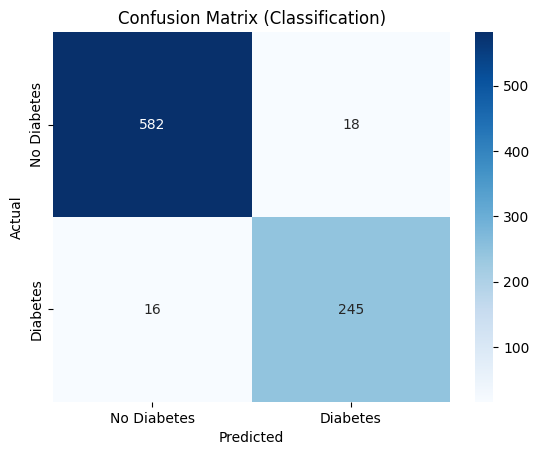

In [12]:
conf_matrix = confusion_matrix(y_test_class, y_pred_clf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Classification)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## <b> <span style='color:#2ae4f5'>|</span>  ROC Curve</b> 

This code plots the ROC curve for the classification model, showing the trade-off between the true positive rate (TPR) and the false positive rate (FPR). It also displays the AUC (Area Under the Curve), which indicates the model's overall performance.

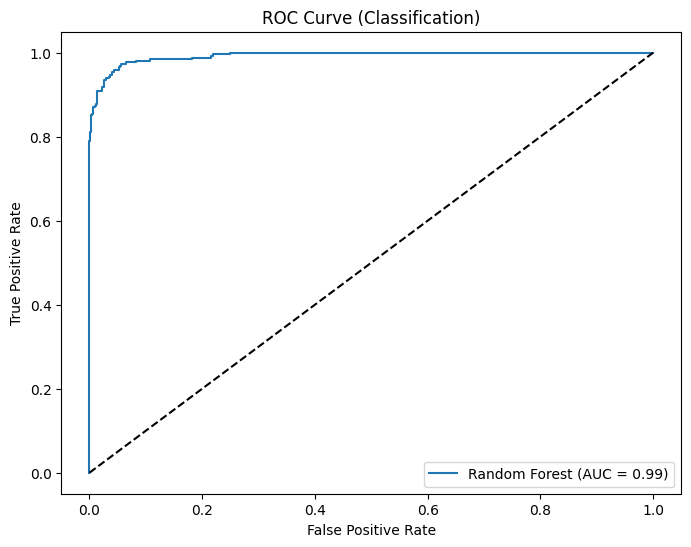

In [13]:
fpr, tpr, thresholds = roc_curve(y_test_class, y_proba_clf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test_class, y_proba_clf)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Classification)')
plt.legend()
plt.show()

## <b> <span style='color:#2ae4f5'>|</span>  Feature Importance</b> 

This code visualizes the feature importances determined by the Random Forest model. It shows which features have the most influence on the classification predictions by plotting them in descending order of importance.

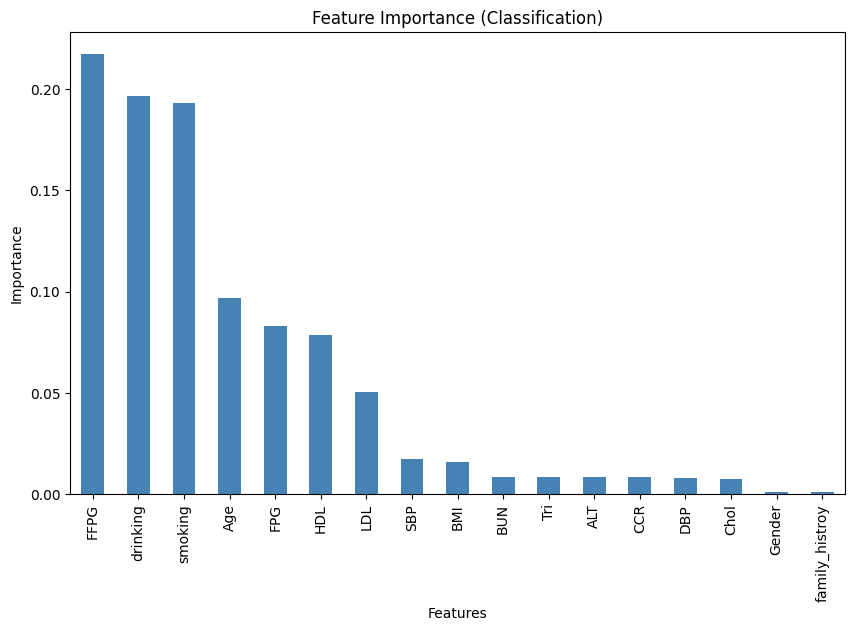

In [14]:
feature_importances = pd.Series(clf.feature_importances_, index=X_class.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar', title="Feature Importance (Classification)", color="steelblue")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## <b> <span style='color:#2ae4f5'>|</span>  1.3 Classification Report</b> 

This code prints a detailed classification report, including precision, recall, F1-score, and support for each class. It provides a comprehensive evaluation of the model's performance across all classes.

In [15]:
print("Classification Report:")
print(classification_report(y_test_class, y_pred_clf))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       600
           1       0.93      0.94      0.94       261

    accuracy                           0.96       861
   macro avg       0.95      0.95      0.95       861
weighted avg       0.96      0.96      0.96       861



## <b> <span style='color:#2ae4f5'>|</span>  2. REGRESSION TASK</b> 

## <b> <span style='color:#2ae4f5'>|</span>  2.1 K-Nearest Neighbors (KNN) Regressor for regression model</b> 

This code initializes and trains a K-Nearest Neighbors (KNN) regressor model with 5 neighbors. It then makes predictions on the test set to evaluate the model’s performance.

In [16]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_knn = knn_reg.predict(X_test_scaled_reg)

## <b> <span style='color:#2ae4f5'>|</span>  2.2 Random Forest Regressor for regression model</b> 

This code initializes and trains a Random Forest regressor model with 100 trees and a maximum depth of 5. It then makes predictions on the test set to evaluate the model's performance.

In [17]:
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
rf_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_scaled_reg)

## <b> <span style='color:#2ae4f5'>|</span>  2.3 Model performance for regression</b> 

This code defines a function to print the performance metrics (MAE, MSE, R²) for regression models. It then evaluates and prints the performance of the KNN and Random Forest models on the test data.

In [18]:
def print_regression_results(y_true, y_pred, model_name):
    print(f"\n{model_name} Regression Results:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")

In [19]:
print_regression_results(y_test_reg, y_pred_knn, "KNN")
print_regression_results(y_test_reg, y_pred_rf, "Random Forest")


KNN Regression Results:
Mean Absolute Error (MAE): 0.0762
Mean Squared Error (MSE): 0.0534
R² Score: 0.7322

Random Forest Regression Results:
Mean Absolute Error (MAE): 0.0742
Mean Squared Error (MSE): 0.0437
R² Score: 0.7809


## <b> <span style='color:#2ae4f5'>|</span>  Visualization: Y is real, etc. Y forecast</b> 

This code visualizes the actual vs. predicted values for the Random Forest regression model. The scatter plot shows the predictions, and the red dashed line represents the ideal fit (where predicted equals actual). This helps to evaluate how well the model's predictions align with the actual values.

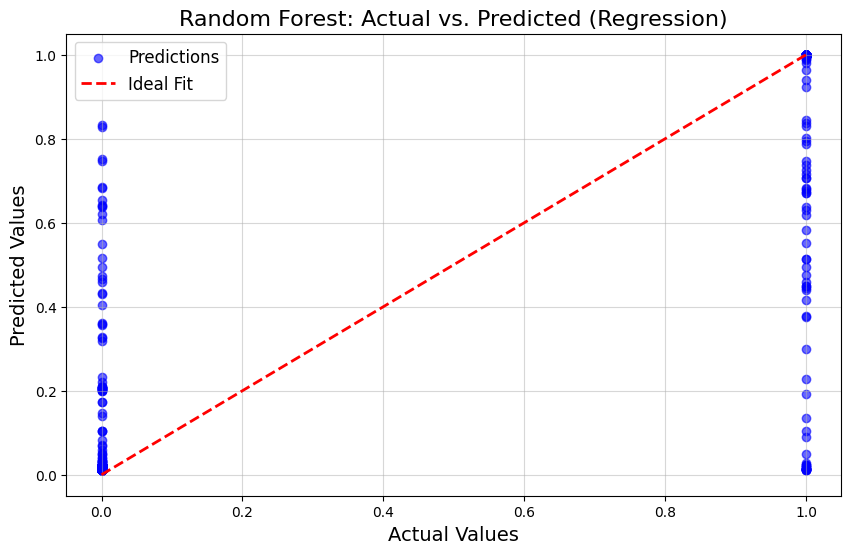

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_rf, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], linestyle='--', color='red', lw=2, label='Ideal Fit')
plt.title("Random Forest: Actual vs. Predicted (Regression)", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

## <b> <span style='color:#2ae4f5'>|</span>  3. CLUSTER ANALYSIS</b> 

## <b> <span style='color:#2ae4f5'>|</span>  3.1 KMeans Clustering</b> 

This code selects two features, 'BMI' and 'Age', from the dataset for clustering. It then initializes an empty list inertia to store the inertia values for different numbers of clusters.

In [21]:
X_cluster = df[['BMI', 'Age']]  
inertia = []

This loop fits KMeans models with different numbers of clusters (from 1 to 10) and appends the inertia (within-cluster sum of squares) for each model to the inertia list. The inertia measures how well the data points are grouped within each cluster.

In [22]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

This code plots the inertia values against the number of clusters. The "elbow method" is used to visually identify the optimal number of clusters, where the inertia starts to decrease at a slower rate.

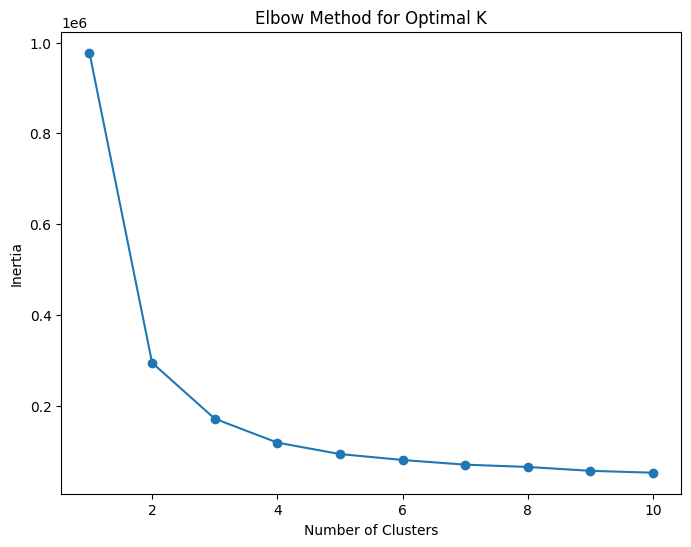

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## <b> <span style='color:#2ae4f5'>|</span>  3.2 KMeans Clustering Execution and Visualization</b> 

This code fits a KMeans model with 3 clusters to the dataset using the 'BMI' and 'Age' features. The random_state=42 ensures reproducibility.

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_cluster)

KMeans(n_clusters=3, random_state=42)

This line assigns the cluster labels from the KMeans model to a new column 'Cluster' in the dataframe. Each data point is now assigned to one of the clusters.

In [25]:
df['Cluster'] = kmeans.labels_

This code visualizes the KMeans clustering results using a scatter plot. The data points are colored according to their assigned clusters, with 'BMI' on the x-axis and 'Age' on the y-axis.

Text(0, 0.5, 'Age')

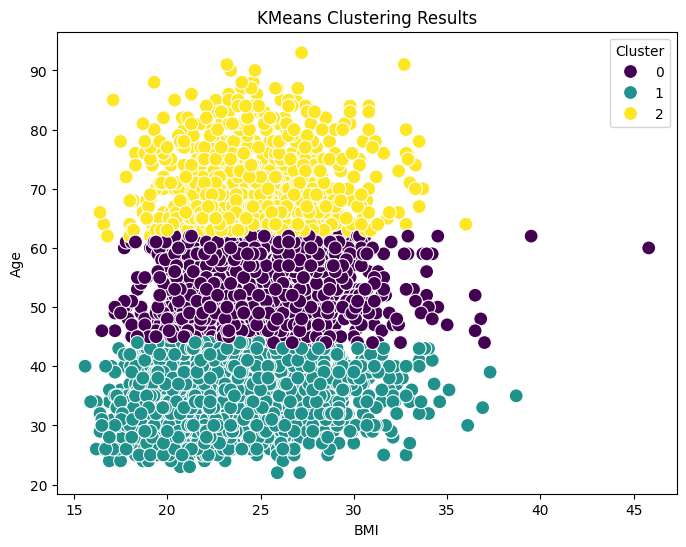

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['BMI'], y=df['Age'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('KMeans Clustering Results')
plt.xlabel('BMI')
plt.ylabel('Age')

This code visualizes the cluster centers in the same scatter plot. The cluster centers are marked with red 'X' symbols, helping to visualize the central points of each cluster.

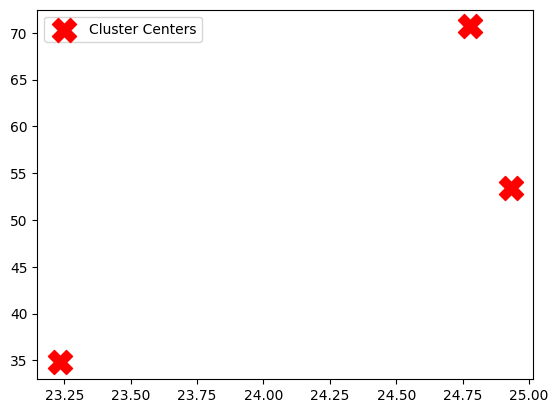

In [27]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Cluster Centers')

plt.legend()
plt.show()

This line prints the coordinates of the cluster centers, which represent the mean values of the features for each cluster.

In [28]:
print("Cluster Centers:", kmeans.cluster_centers_)

Cluster Centers: [[24.93154653 53.41087811]
 [23.23336373 34.77608916]
 [24.77838107 70.68119552]]


## <b> <span style='color:#2ae4f5'>|</span>  4. ASSOCIATION ANALYSIS</b> 

## <b> <span style='color:#2ae4f5'>|</span> 4.1 Apriori Algorithm</b> 

This code converts the 'Diabetes' column to integer type and fills any missing values in the dataframe with 0. This ensures that the dataset is ready for association analysis, where binary data is typically required.

In [29]:
df['Diabetes'] = df['Diabetes'].astype(int)
df = df.fillna(0)

This code converts the dataset into binary values, where values greater than the median are set to True, and others are set to False. This step is necessary for applying the Apriori algorithm.

In [30]:
df_binary = (df > df.median()).astype(bool)

This code applies the Apriori algorithm to the binary dataset with a minimum support of 5%. The use_colnames=True ensures that the itemset names (column names) are used in the results.

In [31]:
frequent_itemsets = apriori(df_binary, min_support=0.05, use_colnames=True)

This line prints the first few rows of the frequent itemsets discovered by the Apriori algorithm, showing the item combinations that meet the minimum support threshold.

In [32]:
print(frequent_itemsets.head())

    support  itemsets
0  0.493377     (Age)
1  0.351615  (Gender)
2  0.490820     (BMI)
3  0.487799     (SBP)
4  0.473623     (DBP)


This code generates association rules from the frequent itemsets using the "lift" metric, with a minimum lift threshold of 1.0. The num_itemsets=2 parameter ensures that only rules with two items are considered.

In [33]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=2)

This line prints the first few rows of the generated association rules, displaying the antecedents, consequents, support, confidence, and lift of each rule.

In [34]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

  antecedents consequents   support  confidence      lift
0       (Age)       (BMI)  0.294911    0.597739  1.217837
1       (BMI)       (Age)  0.294911    0.600852  1.217837
2       (Age)       (SBP)  0.314664    0.637777  1.307457
3       (SBP)       (Age)  0.314664    0.645069  1.307457
4       (Age)       (DBP)  0.287939    0.583608  1.232221


## <b> <span style='color:#2ae4f5'>|</span> 5. ANOMALY DETECTION</b> 

## <b> <span style='color:#2ae4f5'>|</span> 5.1 Isolation Forest for Anomaly Detection</b> 

This code applies the Isolation Forest algorithm to detect anomalies based on 'BMI' and 'Age'. The fit_predict method assigns an anomaly label (1 for normal, -1 for anomaly) to each data point.

In [35]:
iso_forest = IsolationForest(random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df[['BMI', 'Age']])

This code visualizes the anomalies detected by the Isolation Forest algorithm using a scatter plot. Points classified as anomalies are highlighted with a distinct color, making it easier to spot them.

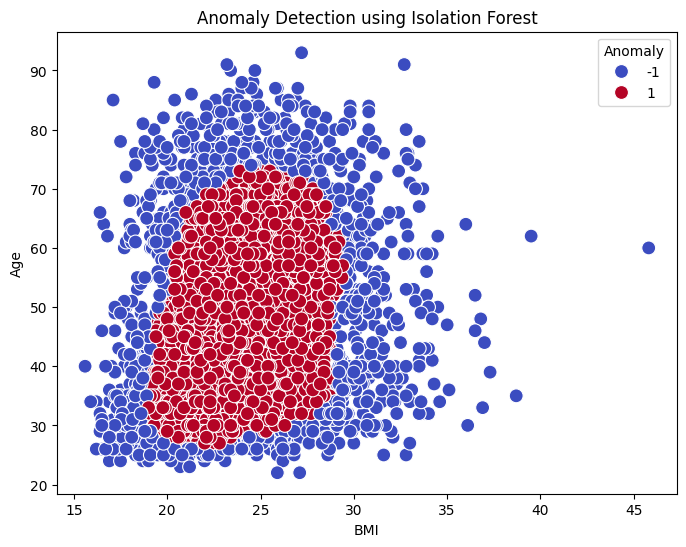

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['BMI'], y=df['Age'], hue=df['Anomaly'], palette='coolwarm', s=100)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()